In [15]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [18]:
data= pd.read_csv('C:/Users/Cold min/OneDrive/바탕 화면/인공지능/car.data')
df = pd.DataFrame(data=data)

In [56]:
df

,vhigh,vhigh.1,2,2.1,small,low,unacc
0,3,3,0,0,2,2,2
1,3,3,0,0,2,0,2
2,3,3,0,0,1,1,2
3,3,3,0,0,1,2,2
4,3,3,0,0,1,0,2
...,...,...,...,...,...,...,...
1722,1,1,3,2,1,2,1
1723,1,1,3,2,1,0,3
1724,1,1,3,2,0,1,2
1725,1,1,3,2,0,2,1


In [57]:
df.isnull().sum()

vhigh      0
vhigh.1    0
2          0
2.1        0
small      0
low        0
unacc      0
dtype: int64

In [58]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for i in data.columns:
    df[i]=le.fit_transform(data[i])

In [59]:
df.head

<bound method NDFrame.head of       vhigh  vhigh.1  2  2.1  small  low  unacc
0         3        3  0    0      2    2      2
1         3        3  0    0      2    0      2
2         3        3  0    0      1    1      2
3         3        3  0    0      1    2      2
4         3        3  0    0      1    0      2
...     ...      ... ..  ...    ...  ...    ...
1722      1        1  3    2      1    2      1
1723      1        1  3    2      1    0      3
1724      1        1  3    2      0    1      2
1725      1        1  3    2      0    2      1
1726      1        1  3    2      0    0      3

[1727 rows x 7 columns]>

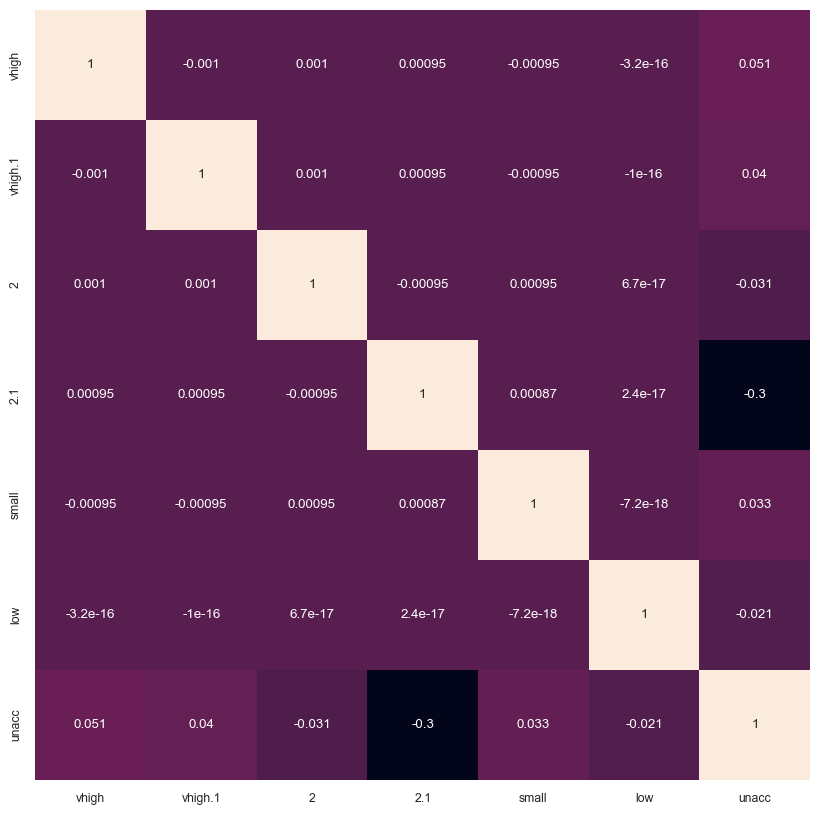

In [60]:
#상관 관계 행렬
data_corr=df.corr()

#히트맵
plt.figure(figsize=(10,10))
sns.set(font_scale=0.8)
sns.heatmap(data_corr, annot=True, cbar=False)
plt.show()

In [61]:
# 데이터 분할
from sklearn.preprocessing import LabelEncoder
encoder =  LabelEncoder()

X = df.drop('unacc', axis=1)
y = df['unacc']

y1 = encoder.fit_transform(y)

Y = pd.get_dummies(y1).values


X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [62]:
X_train.shape

(1381, 6)

In [63]:
y_train.shape

(1381, 4)

In [64]:
#Defining the model 

from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD,Adam


model = Sequential()

model.add(Dense(10,input_shape=(6,),activation='tanh'))
model.add(Dense(8,activation='sigmoid'))
model.add(Dense(6,activation='sigmoid'))
model.add(Dense(4,activation='softmax'))

model.compile(Adam(lr=0.04),'binary_crossentropy',metrics=['accuracy'])
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_19 (Dense)            (None, 10)                70        
                                                                 
 dense_20 (Dense)            (None, 8)                 88        
                                                                 
 dense_21 (Dense)            (None, 6)                 54        
                                                                 
 dense_22 (Dense)            (None, 4)                 28        
                                                                 
Total params: 240
Trainable params: 240
Non-trainable params: 0
_________________________________________________________________


C:\Users\Cold min\anaconda3\lib\site-packages\keras\optimizers\legacy\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [66]:
# fit network
model_history=model.fit(x=X_train, y=y_train, epochs=100, batch_size=32,validation_data= (X_test,y_test))
y_pred = model.predict(X_test)

y_test_class = np.argmax(y_test,axis=1)
y_pred_class = np.argmax(y_pred,axis=1)

Epoch 1/100
44/44 [==============================] - 1s 8ms/step - loss: 0.4064 - accuracy: 0.6365 - val_loss: 0.3637 - val_accuracy: 0.6850
Epoch 2/100
44/44 [==============================] - 0s 2ms/step - loss: 0.3187 - accuracy: 0.7038 - val_loss: 0.3167 - val_accuracy: 0.6850
Epoch 3/100
44/44 [==============================] - 0s 2ms/step - loss: 0.3042 - accuracy: 0.7038 - val_loss: 0.3136 - val_accuracy: 0.6850
Epoch 4/100
44/44 [==============================] - 0s 3ms/step - loss: 0.2959 - accuracy: 0.7038 - val_loss: 0.3049 - val_accuracy: 0.6850
Epoch 5/100
44/44 [==============================] - 0s 3ms/step - loss: 0.2922 - accuracy: 0.7038 - val_loss: 0.2939 - val_accuracy: 0.6850
Epoch 6/100
44/44 [==============================] - 0s 3ms/step - loss: 0.2667 - accuracy: 0.7560 - val_loss: 0.2742 - val_accuracy: 0.7514
Epoch 7/100
44/44 [==============================] - 0s 2ms/step - loss: 0.2622 - accuracy: 0.7734 - val_loss: 0.2687 - val_accuracy: 0.7514
Epoch 8/100
4

Epoch 59/100
44/44 [==============================] - 0s 2ms/step - loss: 0.1475 - accuracy: 0.8639 - val_loss: 0.1465 - val_accuracy: 0.8728
Epoch 60/100
44/44 [==============================] - 0s 3ms/step - loss: 0.1437 - accuracy: 0.8704 - val_loss: 0.1457 - val_accuracy: 0.8613
Epoch 61/100
44/44 [==============================] - 0s 2ms/step - loss: 0.1452 - accuracy: 0.8653 - val_loss: 0.1581 - val_accuracy: 0.8526
Epoch 62/100
44/44 [==============================] - 0s 3ms/step - loss: 0.1481 - accuracy: 0.8523 - val_loss: 0.1643 - val_accuracy: 0.8410
Epoch 63/100
44/44 [==============================] - 0s 3ms/step - loss: 0.1500 - accuracy: 0.8668 - val_loss: 0.1656 - val_accuracy: 0.8526
Epoch 64/100
44/44 [==============================] - 0s 2ms/step - loss: 0.1530 - accuracy: 0.8653 - val_loss: 0.1667 - val_accuracy: 0.8497
Epoch 65/100
44/44 [==============================] - 0s 3ms/step - loss: 0.1491 - accuracy: 0.8718 - val_loss: 0.1546 - val_accuracy: 0.8642
Epoch 

In [67]:
         #Accuracy of the predicted values
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test_class,y_pred_class))
print(confusion_matrix(y_test_class,y_pred_class))

              precision    recall  f1-score   support

           0       0.70      0.90      0.78        77
           1       0.00      0.00      0.00        15
           2       0.99      0.94      0.96       237
           3       0.65      0.88      0.75        17

    accuracy                           0.88       346
   macro avg       0.59      0.68      0.62       346
weighted avg       0.87      0.88      0.87       346

[[ 69   0   2   6]
 [ 15   0   0   0]
 [ 13   0 222   2]
 [  2   0   0  15]]


C:\Users\Cold min\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Cold min\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Cold min\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
